<a href="https://colab.research.google.com/github/pradolucas/vis-dados/blob/main/Atividade1_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("VIS_Pr_01_Vendas.csv", encoding="windows-1252")

## 1)

In [ ]:
vis_1 = df[["Sales", "Profit", "Region", "Discount"]].copy()
vis_1 = vis_1.groupby(["Region"]).aggregate({"Sales": sum, "Profit": sum, "Discount": np.mean})
vis_1

,Sales,Profit,Discount
Region,,,
Central,230987.6244,15016.8592,0.232435
East,306833.5790,40471.4019,0.148673
South,196540.3640,21377.3504,0.137912
West,329684.4745,43135.1023,0.116690


In [ ]:
vis_1.to_csv("salesxprofit_segBy_Region.csv")

2)

In [ ]:
vis_sub = df[["Sub-Category", "Profit", "Order Date"]].copy()
vis_sub["Order Date Year"] = pd.to_datetime(vis_sub["Order Date"]).apply(lambda date: date.year)

In [ ]:
data = vis_sub.groupby(["Sub-Category", "Order Date Year"]).Profit.sum().reset_index()
data

,Sub-Category,Order Date Year,Profit
0,Accessories,2014,2488.3589
1,Accessories,2015,5199.9768
2,Accessories,2016,3484.4872
3,Accessories,2017,7465.4572
4,Appliances,2014,1053.8435
...,...,...,...
63,Supplies,2017,-1170.4100
64,Tables,2014,-1410.2823
65,Tables,2015,-794.8372
66,Tables,2016,-2974.6664


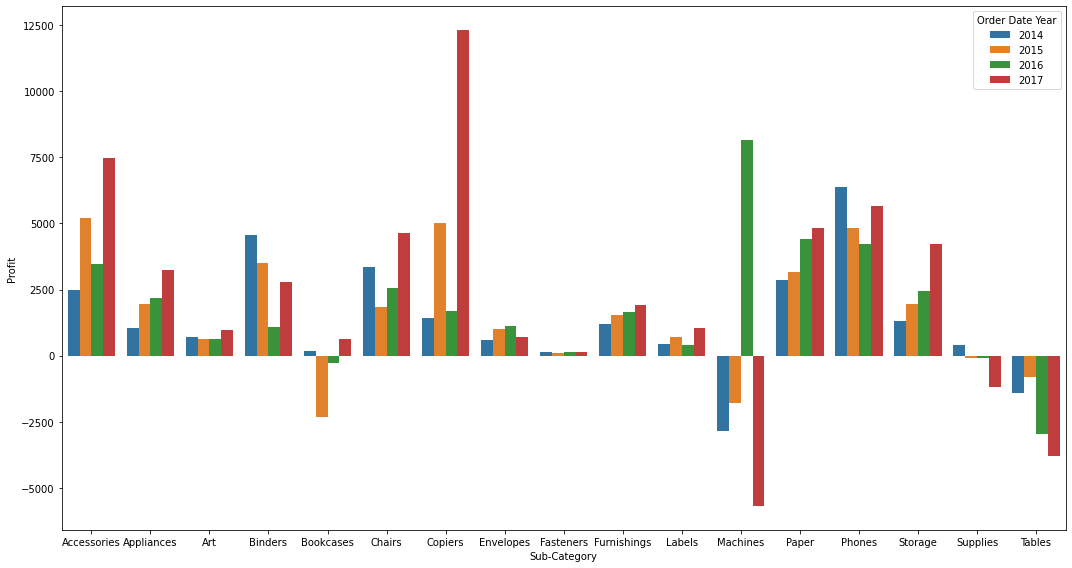

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=data,
            x="Sub-Category",
            y="Profit",
            hue="Order Date Year")
plt.tight_layout()

3)

In [ ]:
vis_3 = df[["Segment", "Profit", "Sales", "Discount"]].copy()

bins = [0, 0.1, .15, .2, .25, 1]
labels=["A", "B", "C", "D", "E"]

vis_3["Classe"] = vis_3["Profit"]/(vis_3["Sales"] - vis_3["Discount"])
vis_3["Classe"] = pd.cut(vis_3['Classe'], bins=bins, labels=labels, include_lowest=True)
vis_3 = pd.DataFrame(vis_3.groupby(["Segment", "Classe"]).size()).rename(columns={0: "Count"})

In [ ]:
vis_3

Count
Segment     Classe       
Consumer    A         270
            B         188
            C          87
            D          98
            E        1331
Corporate   A         157
            B          93
            C          51
            D          45
            E         730
Home Office A          84
            B          53
            C          30
            D          47
            E         480

In [ ]:
vis_3.to_csv("SegmentxClasse_count.csv")